# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('test.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


# Checking for missing values in the dataset

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

`There are no missing values present in the database`

# Describing the Dataset

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
sns.set()

# Data Visualization

<Axes: xlabel='Exited', ylabel='count'>

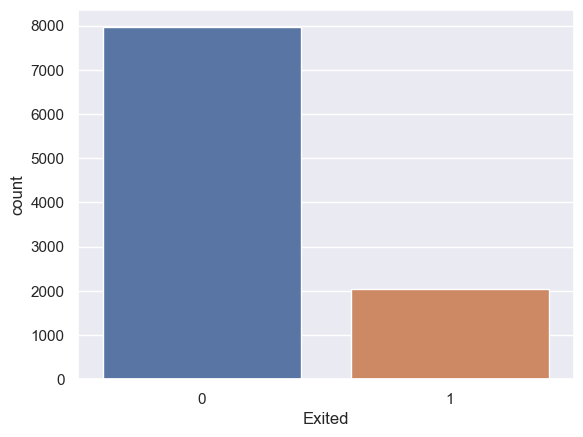

In [10]:
sns.countplot(x = 'Exited', data = df)

In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

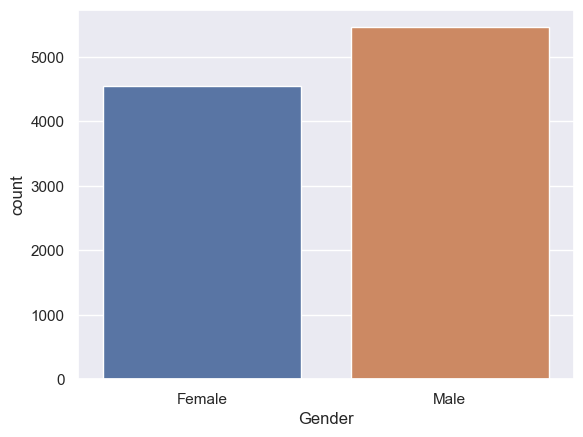

In [12]:
sns.countplot(x = 'Gender', data = df)

<Axes: xlabel='Gender', ylabel='Exited'>

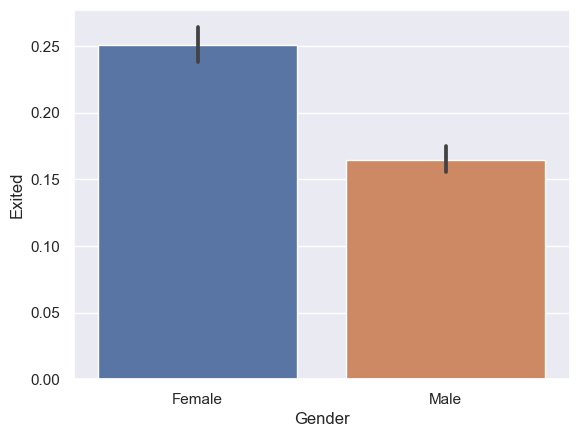

In [13]:
# No of Churn customers based on gender
sns.barplot(x = 'Gender', y = 'Exited', data = df)

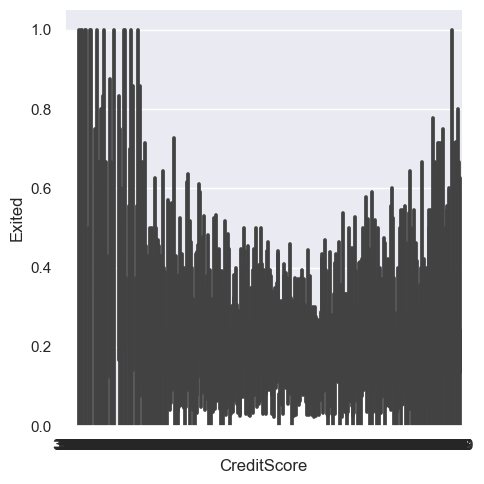

In [14]:
sns.catplot(x='CreditScore', y='Exited', kind='bar', data=df, palette='husl')

<Axes: xlabel='Geography', ylabel='Exited'>

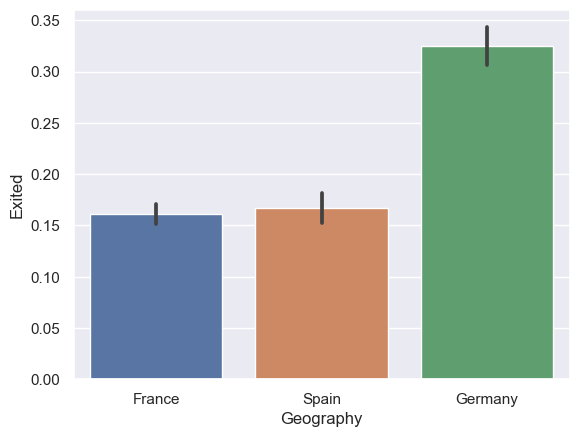

In [15]:
sns.barplot(x = 'Geography', y = 'Exited', data = df)

<Axes: xlabel='Age', ylabel='Exited'>

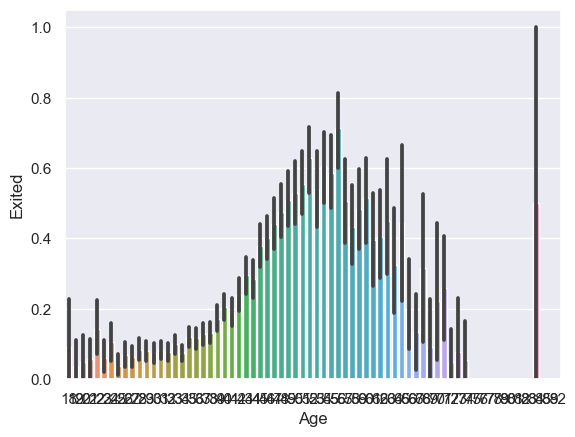

In [16]:
sns.barplot(x = 'Age', y = 'Exited', data = df)

<Axes: xlabel='HasCrCard', ylabel='count'>

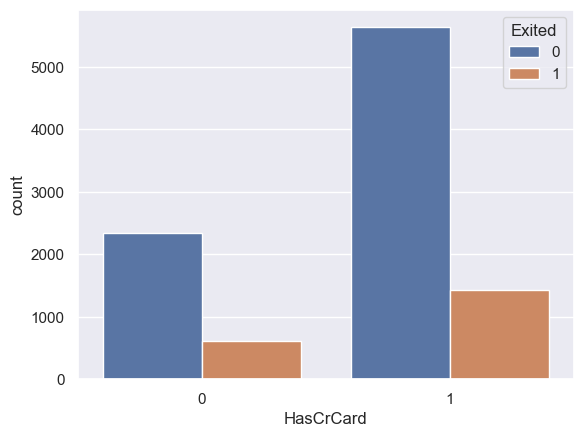

In [17]:
sns.countplot(x = 'HasCrCard', hue = 'Exited', data = df)

<Axes: xlabel='IsActiveMember', ylabel='count'>

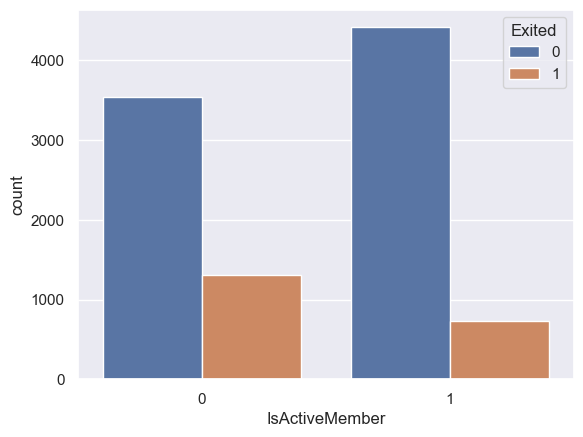

In [18]:
sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = df)

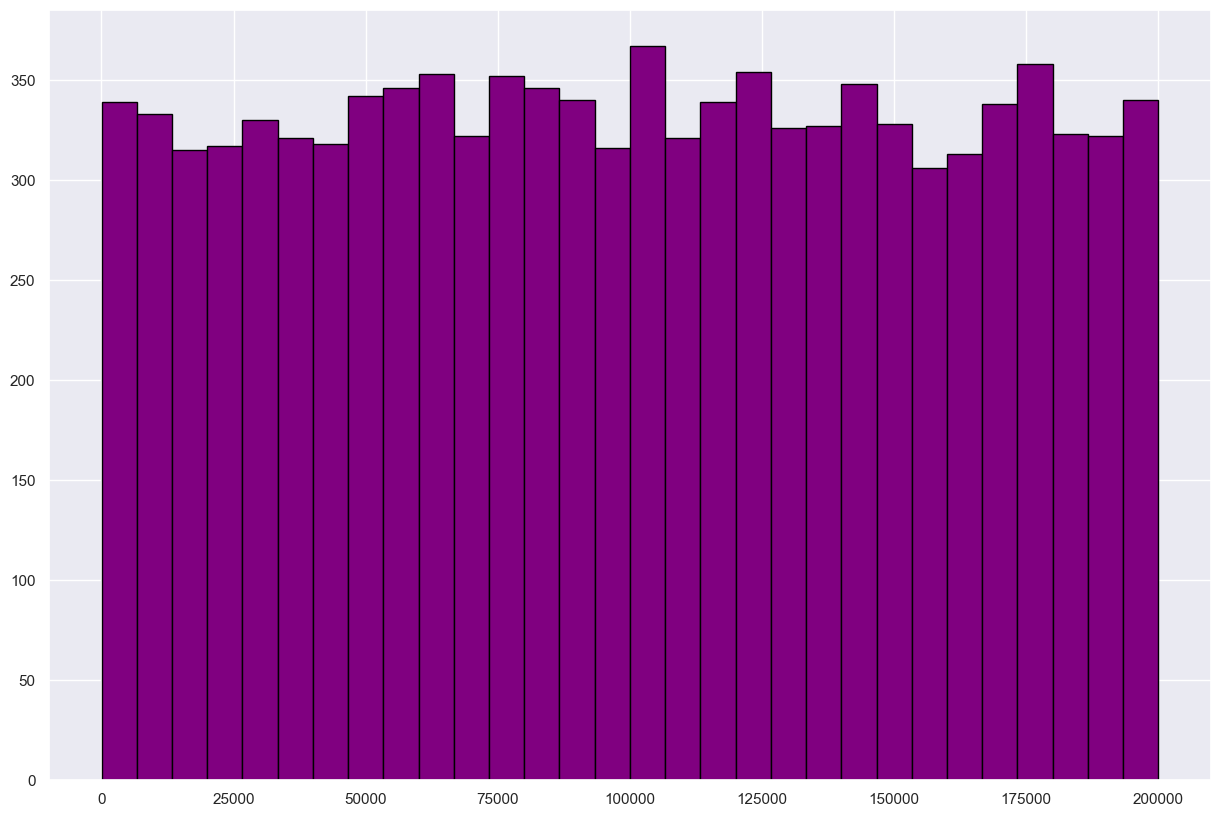

In [33]:
plt.figure(figsize=(15, 10))
plt.hist(df['EstimatedSalary'], bins=30, color='purple', edgecolor='black')
plt.show()

In [20]:
df.replace({'Gender': {'Male': 0, 'Female': 1}, 'Geography': {'France': 0, 'Spain': 1, 'Germany': 2}}, inplace = True)

C:\Users\Wednesday -__-\AppData\Local\Temp\ipykernel_5008\3582580692.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender': {'Male': 0, 'Female': 1}, 'Geography': {'France': 0, 'Spain': 1, 'Germany': 2}}, inplace = True)


In [21]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,1,43,2,125510.82,1,1,1,79084.10,0


# Seperating Features and Target

In [39]:
X = df.drop(columns = ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'], axis = 1)
Y = df['Exited']

In [40]:
print(X)

      RowNumber  Tenure    Balance  NumOfProducts
0             1       2       0.00              1
1             2       1   83807.86              1
2             3       8  159660.80              3
3             4       1       0.00              2
4             5       2  125510.82              1
...         ...     ...        ...            ...
9995       9996       5       0.00              2
9996       9997      10   57369.61              1
9997       9998       7       0.00              1
9998       9999       3   75075.31              2
9999      10000       4  130142.79              1

[10000 rows x 4 columns]


In [41]:
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


# Seperating data for testing and training

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [43]:
print(X_train, X_train.shape, X_test.shape)

      RowNumber  Tenure    Balance  NumOfProducts
8856       8857       5       0.00              2
1545       1546       6  158414.85              1
8136       8137       1       0.00              2
7768       7769       9  122446.61              2
7782       7783       8   87105.32              1
...         ...     ...        ...            ...
1099       1100       7       0.00              2
2514       2515       4  105082.07              2
6637       6638       3       0.00              2
2575       2576       5  102994.04              1
7336       7337       7       0.00              2

[8000 rows x 4 columns] (8000, 4) (2000, 4)


# MODEL: Logistic Regression Model

In [44]:
model = LogisticRegression()

In [45]:
model.fit(X_train, Y_train)

C:\Users\Wednesday -__-\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Accuracy Score

In [46]:
X_train_prediction = model.predict(X_train)

In [47]:
print(X_train_prediction)

[0 0 0 ... 0 0 0]


In [48]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy Score of the training data: ", training_data_accuracy)

Accuracy Score of the training data:  0.79325


In [49]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)

In [50]:
print(X_test_prediction)

[0 0 0 ... 0 0 0]


In [51]:
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy Score of the training data: ", testing_data_accuracy)

Accuracy Score of the training data:  0.8085
